## Diabetes Detection Project

This notebook contains the code developed for the Diabetes Detection Project. Throughout the document, all stages of the classification workflow are presented in a structured manner: data loading and exploration, data preprocessing, model construction and evaluation, and results analysis.

In addition to the code, detailed explanations are included to help understand each step taken and the methodological decisions made during the project.

### Web con el trabajo hecho:
https://www.kaggle.com/code/zabihullah18/diabetes-prediction/notebook

#### DataSet Information

The Diabetes Health Indicators Dataset is a public dataset available on Kaggle and the UCI Machine Learning Repository (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?). It originates from the CDC’s BRFSS (Behavioral Risk Factor Surveillance System) survey, a large-scale epidemiological study conducted in the United States. The dataset contains over 70,000 samples and 35 features that include demographic information, lifestyle habits, health indicators, and responses to medical questionnaires.


The task addressed in this project is a supervised classification problem, where the target variable represents the patient's diabetes status with three classes:

- 0: Healthy
- 1: Prediabetes
- 2: Diabetes

This dataset is particularly suitable for training and comparing classification models, evaluating imbalance-handling techniques, and analyzing the relevance of health-related variables.

| Variable             | Descripción                                                                                  | Valores posibles                                  |
|----------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------|
| **Diabetes**         | Estado del paciente respecto a la diabetes                                                   | No, Pre-Diabetes, Diabetes                     |
| **HighBP**           | Hipertensión: presión arterial alta                                                         | No, Yes                                        |
| **HighChol**         | Colesterol alto                                                                              | No, Yes                                        |
| **CholCheck**        | Ha realizado un control de colesterol en los últimos 5 años                                  | No, Yes                                        |
| **Smoker**           | ¿Ha fumado al menos 100 cigarrillos en su vida?                                             | No, Yes                                        |
| **Stroke**           | ¿Ha tenido algún accidente cerebrovascular?                                                 | No, Yes                                        |
| **HeartAttack**      | Enfermedad cardíaca o infarto previo                                                        | No, Yes                                        |
| **PhysActivity**     | Ha realizado actividad física en los últimos 30 días                                        | No, Yes                                        |
| **Fruits**           | Consume fruta al menos una vez al día                                                      | No, Yes                                        |
| **Veggies**          | Consume verduras al menos una vez al día                                                  | No, Yes                                        |
| **Heavy_drinking**   | Consumo excesivo de alcohol (hombres >14, mujeres >7 bebidas/semana)                        | No, Yes                                        |
| **HealthCare**       | Tiene algún tipo de cobertura sanitaria (seguro, HMO, etc.)                                 | No, Yes                                        |
| **Unaffordable_care**| ¿Ha necesitado atención médica en los últimos 12 meses pero no pudo por coste?              | No, Yes                                        |
| **GeneralHealth**    | Salud general percibida                                                                      | Excellent, Very Good, Good, Fair, Poor        |
| **PhysicalHealth**   | Número de días en el último mes con problemas físicos                                        | Valor numérico (0-30)                          |
| **MentalHealth**     | Número de días en el último mes con problemas mentales                                       | Valor numérico (0-30)                          |
| **DiffWalk**         | ¿Tiene dificultad para caminar o subir escaleras?                                           | No, Yes                                        |
| **Sex**              | Sexo del paciente                                                                            | Female, Male                                   |


In [88]:
import json 

with open('../data/dictionary.json', 'r') as f:
    data_dict = json.load(f)

# display(data_dict)

In [89]:
import pandas as pd

# Ruta del archivo CSV
archivo_csv = "../data/diabetes_012_health_indicators_BRFSS2015.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(archivo_csv)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


Hacemos un primer estudio de los tipos de datos, ya que en su mayoria son valores numéricos, pero pueden existir variables categoricas, y tipos que debamos corregir.

In [90]:
# Mostrar valores únicos de cada columna (útil para inspeccionar)
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].dtype, df[col].unique()[:10])  


Columna: Diabetes_012
float64 [0. 2. 1.]

Columna: HighBP
float64 [1. 0.]

Columna: HighChol
float64 [1. 0.]

Columna: CholCheck
float64 [1. 0.]

Columna: BMI
float64 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]

Columna: Smoker
float64 [1. 0.]

Columna: Stroke
float64 [0. 1.]

Columna: HeartDiseaseorAttack
float64 [0. 1.]

Columna: PhysActivity
float64 [0. 1.]

Columna: Fruits
float64 [0. 1.]

Columna: Veggies
float64 [1. 0.]

Columna: HvyAlcoholConsump
float64 [0. 1.]

Columna: AnyHealthcare
float64 [1. 0.]

Columna: NoDocbcCost
float64 [0. 1.]

Columna: GenHlth
float64 [5. 3. 2. 4. 1.]

Columna: MentHlth
float64 [18.  0. 30.  3.  5. 15. 10.  6. 20.  2.]

Columna: PhysHlth
float64 [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.]

Columna: DiffWalk
float64 [1. 0.]

Columna: Sex
float64 [0. 1.]

Columna: Age
float64 [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.]

Columna: Education
float64 [4. 6. 3. 5. 2. 1.]

Columna: Income
float64 [3. 1. 8. 6. 4. 7. 2. 5.]


In [91]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df.rename(columns={'HeartDiseaseorAttack': 'HeartAttack'}, inplace=True)
df.rename(columns={'HvyAlcoholConsump': 'Heavy_drinking'}, inplace=True)
df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df.rename(columns={'NoDocbcCost': 'Unaffordable_care'}, inplace=True)
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'MentHlth': 'MentalHealth'}, inplace=True)
df.rename(columns={'PhysHlth': 'PhysicalHealth'}, inplace=True)

In [92]:
# Función para restaurar MentalHealth y PhysicalHealth como numéricas en el JSON
def original_dict(dict_path='../data/dictionary.json'):
    import json

    with open(dict_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    data['MentalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days mental health was not good (1–30)"
    }

    data['PhysicalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days physical health was not good (1–30)"
    }

    with open(dict_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)


original_dict()


In [93]:
# Lista de columnas que queremos convertir a int
cols_to_int = [
    'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 
    'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex', 
    'Age', 'Education', 'Income',
]

# Convertir columnas a int antes de mapear
for col in cols_to_int:
    df[col] = df[col].astype(int)

In [94]:
print("📌 Dimensiones del dataset:")
print(df.shape)

# print(df.info())

summary = pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
})

print(summary)

📌 Dimensiones del dataset:
(253680, 22)
                     dtype  nulls
Diabetes             int64      0
HighBP               int64      0
HighChol             int64      0
CholCheck            int64      0
BMI                float64      0
Smoker               int64      0
Stroke               int64      0
HeartAttack          int64      0
PhysActivity         int64      0
Fruits               int64      0
Veggies              int64      0
Heavy_drinking       int64      0
HealthCare           int64      0
Unaffordable_care    int64      0
GeneralHealth        int64      0
MentalHealth       float64      0
PhysicalHealth     float64      0
DiffWalk             int64      0
Sex                  int64      0
Age                  int64      0
Education            int64      0
Income               int64      0


In [95]:
TARGET_COL = 'Diabetes' # 'recommendationClass'

ordinal_vars = [k for k, v in data_dict.items() if v["type"] == "ordinal"]
categorical_vars = [k for k, v in data_dict.items() if v["type"] == "categorical"]
numerical_vars = [k for k, v in data_dict.items() if v["type"] == "numerical"]


y = df[TARGET_COL]
X = df[numerical_vars + categorical_vars + ordinal_vars]

print(f"Forma de X (features): {X.shape}")
print(X.columns.tolist())
print(f"\nForma de y (target): {y.shape}")
print(y.value_counts())

Forma de X (features): (253680, 21)
['BMI', 'MentalHealth', 'PhysicalHealth', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'DiffWalk', 'Sex', 'GeneralHealth', 'Age', 'Education', 'Income']

Forma de y (target): (253680,)
Diabetes
0    213703
2     35346
1      4631
Name: count, dtype: int64


In [96]:
print("\n📌 Estadísticas descriptivas (numéricas):")
print(df[numerical_vars].describe())


📌 Estadísticas descriptivas (numéricas):
                 BMI   MentalHealth  PhysicalHealth
count  253680.000000  253680.000000   253680.000000
mean       28.382364       3.184772        4.242081
std         6.608694       7.412847        8.717951
min        12.000000       0.000000        0.000000
25%        24.000000       0.000000        0.000000
50%        27.000000       0.000000        0.000000
75%        31.000000       2.000000        3.000000
max        98.000000      30.000000       30.000000


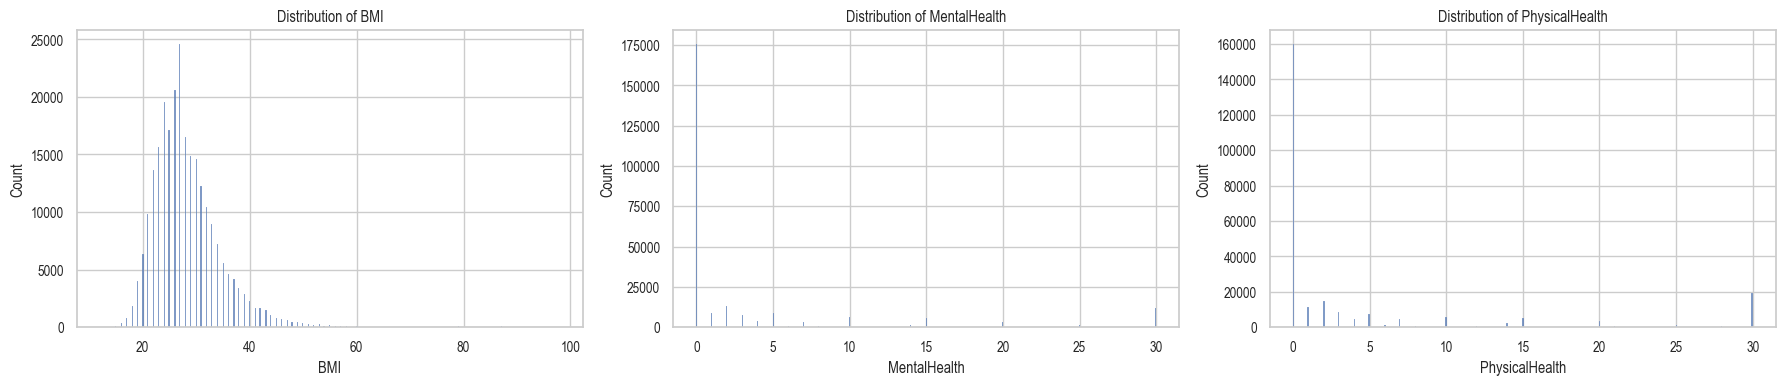

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = numerical_vars

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(18, 4))
axes = axes.flatten()

for i in range(len(cols_to_plot)):
    sns.histplot(df[cols_to_plot[i]], ax=axes[i])
    axes[i].set_title(f"Distribution of {cols_to_plot[i]}")

plt.tight_layout()
plt.show()


Como se puede comprobar en los gráficos de distribución de MentalHealth y PhysicalHealth, están sesgados porque la gente responde con números enteros, y acabados en 5. Es por eso que vamos a agrupar los enteros de estas variables en 6 grupos de forma que se convertirá en variables ordinales.

In [98]:
# Funciones para discretizar MentalHealth y Physicalhealth
def discretize_numerical_features(value):
    """
    Discretiza los días de salud mental en categorías de 5 días:
    0: (0 días)
    1: (1-5 días)
    2: (6-10 días)
    3: (11-15 días)
    4: (16-20 días)
    5: (21-25 días)
    6: (26-30 días)
    """
    if value == 0:
        return 0
    elif 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:  # 26-30
        return 6


# Función para actualizar el diccionario JSON con la discretización de MentalHealth
def discretize_in_dict(dict_path='../data/dictionary.json', variable=None):
    """
    Actualiza el diccionario JSON para reflejar que MentalHealth ahora es ordinal
    con categorías discretas de 5 días.
    
    Parameters:
    -----------
    dict_path : str
        Ruta al archivo dictionary.json
    """
    import json
    
    # Leer el JSON actual
    with open(dict_path, 'r') as f:
        data_dict = json.load(f)
    
    # Actualizar MentalHealth
    data_dict[variable] = {
        "type": "ordinal",
        "map": {
            "0": "0",
            "1": "1-5",
            "2": "6-10",
            "3": "11-15",
            "4": "16-20",
            "5": "21-25",
            "6": "26-30"
        },
        "description": f"Discretized {variable} (5-day groups). 0 = 0 days, 1 = 1-5 days, 2 = 6-10 days, 3 = 11-15 days, 4 = 16-20 days, 5 = 21-25 days, 6 = 26-30 days"
    }
    
    # Guardar el JSON actualizado
    with open(dict_path, 'w') as f:
        json.dump(data_dict, f, indent=2)
    
    print(f"✅ Diccionario JSON actualizado con {variable}")


In [99]:
# Aplicar discretización
df['MentalHealth'] = df['MentalHealth'].apply(discretize_numerical_features)
df['PhysicalHealth'] = df['PhysicalHealth'].apply(discretize_numerical_features)

discretize_in_dict(variable='MentalHealth')
discretize_in_dict(variable='PhysicalHealth')

numerical_vars.remove('MentalHealth')
numerical_vars.remove('PhysicalHealth')
ordinal_vars.extend(['MentalHealth', 'PhysicalHealth'])

print(numerical_vars)
print(ordinal_vars)

✅ Diccionario JSON actualizado con MentalHealth
✅ Diccionario JSON actualizado con PhysicalHealth
['BMI']
['GeneralHealth', 'Age', 'Education', 'Income', 'MentalHealth', 'PhysicalHealth']


In [100]:
# #Guardar el dataset limpio

# df.to_csv('../data/diabetes_012_cleaned.csv', index=False)
# print("✅ Dataset limpio guardado en '../data/diabetes_012_cleaned.csv'")

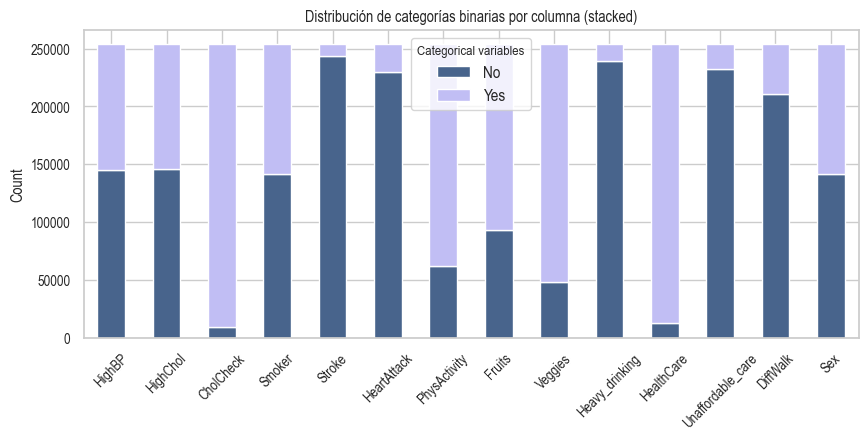

In [101]:
#Todas las variables categóricas son binarias
cat_counts = pd.DataFrame({col: df[col].value_counts() for col in categorical_vars if df[col].nunique() == 2}).T.fillna(0)
cat_counts.plot(kind="bar", stacked=True, figsize=(10,4), color = ["#48648c", "#c1bef4"])
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribución de categorías binarias por columna (stacked)")
plt.legend(labels=['No', 'Yes'], title='Categorical variables', fontsize=12, title_fontsize=10) 
plt.show()

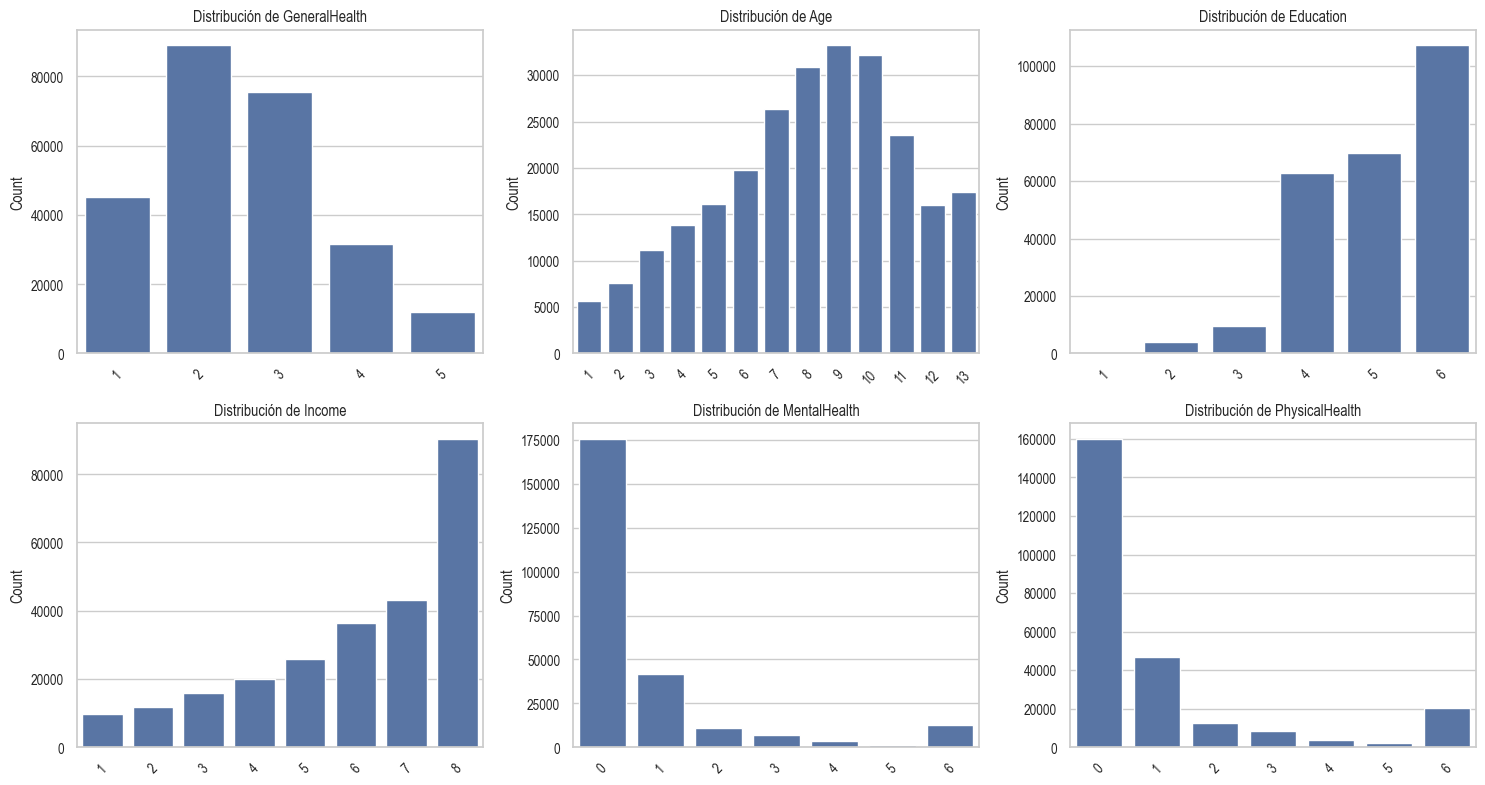

In [102]:
import math
# Número de columnas no binarias
n_cols = len(ordinal_vars)
cols_por_fila = 3
n_filas = math.ceil(n_cols / cols_por_fila)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_filas, cols_por_fila, figsize=(5*cols_por_fila, 4*n_filas))
axes = axes.flatten()  # para iterar fácilmente

for i, col in enumerate(ordinal_vars):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### PASO 2:  NORMALIZAR (ESTANDARIZAR) LAS VARIABLES NUMÉRICAS

Quizás también sería conveniente normalizar las ordinales con un min-max

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# ¡¡COMENTAR LA QUE NO SE NECESITE!!

scaler = StandardScaler()
# scaler = MinMaxScaler()


df_std = df.copy()
df_std[numerical_vars] = scaler.fit_transform(df[numerical_vars])


# ¿DEBERÍAMOS NORMALIZAR TAMBIÉN LAS ORDINALES? 

# scaler = MinMaxScaler()
# df_std[ordinal_vars] = scaler.fit_transform(df[ordinal_vars])

In [104]:
from scipy import stats
import numpy as np


print("\n📌 Outliers detectados (Z-score > 3):")
for col in numerical_vars:
    zs = np.abs(stats.zscore(df[col]))
    outliers = (zs > 3).sum()
    print(f"{col}: {outliers} outliers")

print("\n📌 Outliers detectados usando IQR:")
for col in numerical_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col].count()
    print(f"{col}: {outliers} outliers")


📌 Outliers detectados (Z-score > 3):
BMI: 2963 outliers

📌 Outliers detectados usando IQR:
BMI: 9847 outliers


#### PASO 3: VISUALIZAR LAS VARIABLES SEPARADAS POR EL VALOR EN LA CLASE OBJETIVO

También se realizará un sampling para meter en los train y el test sets grupos equilibrados de la clase objetivo


--- 3.1. Análisis del Target (diabetes class) ---
Estadísticas Descriptivas del Target:
count    253680.000000
mean          0.296921
std           0.698160
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes, dtype: float64

Balance de Clases (Target):
Diabetes
0    84.24 %
1     1.83 %
2    13.93 %
Name: proportion, dtype: object


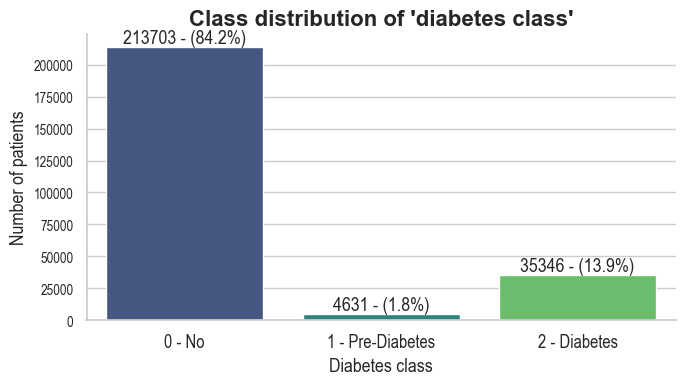

In [105]:
import warnings 

warnings.filterwarnings("ignore")

print("\n--- 3.1. Análisis del Target (diabetes class) ---")
print("Estadísticas Descriptivas del Target:")
print(df[TARGET_COL].describe())

print("\nBalance de Clases (Target):")
class_counts = df[TARGET_COL].value_counts().sort_index()
class_balance = df[TARGET_COL].value_counts(normalize=True).mul(100).round(2).sort_index()
print(class_balance.astype(str) + ' %')

# Mapeo de clases a nombres
class_labels = {
    0: data_dict[TARGET_COL]['map']["0"],
    1: data_dict[TARGET_COL]['map']["1"],
    2: data_dict[TARGET_COL]['map']["2"]
}

# Crear figura
plt.figure(figsize=(7, 4))
ax = sns.countplot(x=df[TARGET_COL], palette='viridis', order=sorted(df[TARGET_COL].unique()))

# Títulos y etiquetas
plt.title(f'Class distribution of \'diabetes class\'', fontsize=16, weight='bold')
plt.xlabel('Diabetes class', fontsize=14)
plt.ylabel('Number of patients', fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Reemplazar los valores del eje X con las etiquetas descriptivas
ax.set_xticklabels(
    [f"{i} - {class_labels[i]}" for i in sorted(df[TARGET_COL].unique())],
    fontsize=13
)

# Añadir número de muestras y porcentaje encima de cada barra
for p in ax.patches:
    height = p.get_height()
    class_val = int(p.get_x() + p.get_width() / 2)
    count = int(height)
    pct = class_balance[class_val]
    ax.annotate(f'{count} - ({pct:.1f}%)', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()
# plt.savefig(os.path.join(output_dir, 'eda_1_target_distribution.png'))
# plt.close()


In [106]:
# --- 3.2.1. Estadísticas Descriptivas (Ordinales y numéricas) ---
numeric_summary = df[numerical_vars+ordinal_vars].describe().T
print(numeric_summary)



                   count       mean       std   min   25%   50%   75%   max
BMI             253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0  98.0
GeneralHealth   253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   5.0
Age             253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0  13.0
Education       253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   6.0
Income          253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   8.0
MentalHealth    253680.0   0.725453  1.500473   0.0   0.0   0.0   1.0   6.0
PhysicalHealth  253680.0   0.960955  1.754199   0.0   0.0   0.0   1.0   6.0


#### PASO 4: DETECCIÓN DE OUTLIERS EN ORDINALES Y NUMÉRICAS (EXPERIMENTO)

Generando grid de 7 filas (2 bloques) y 4 columnas...


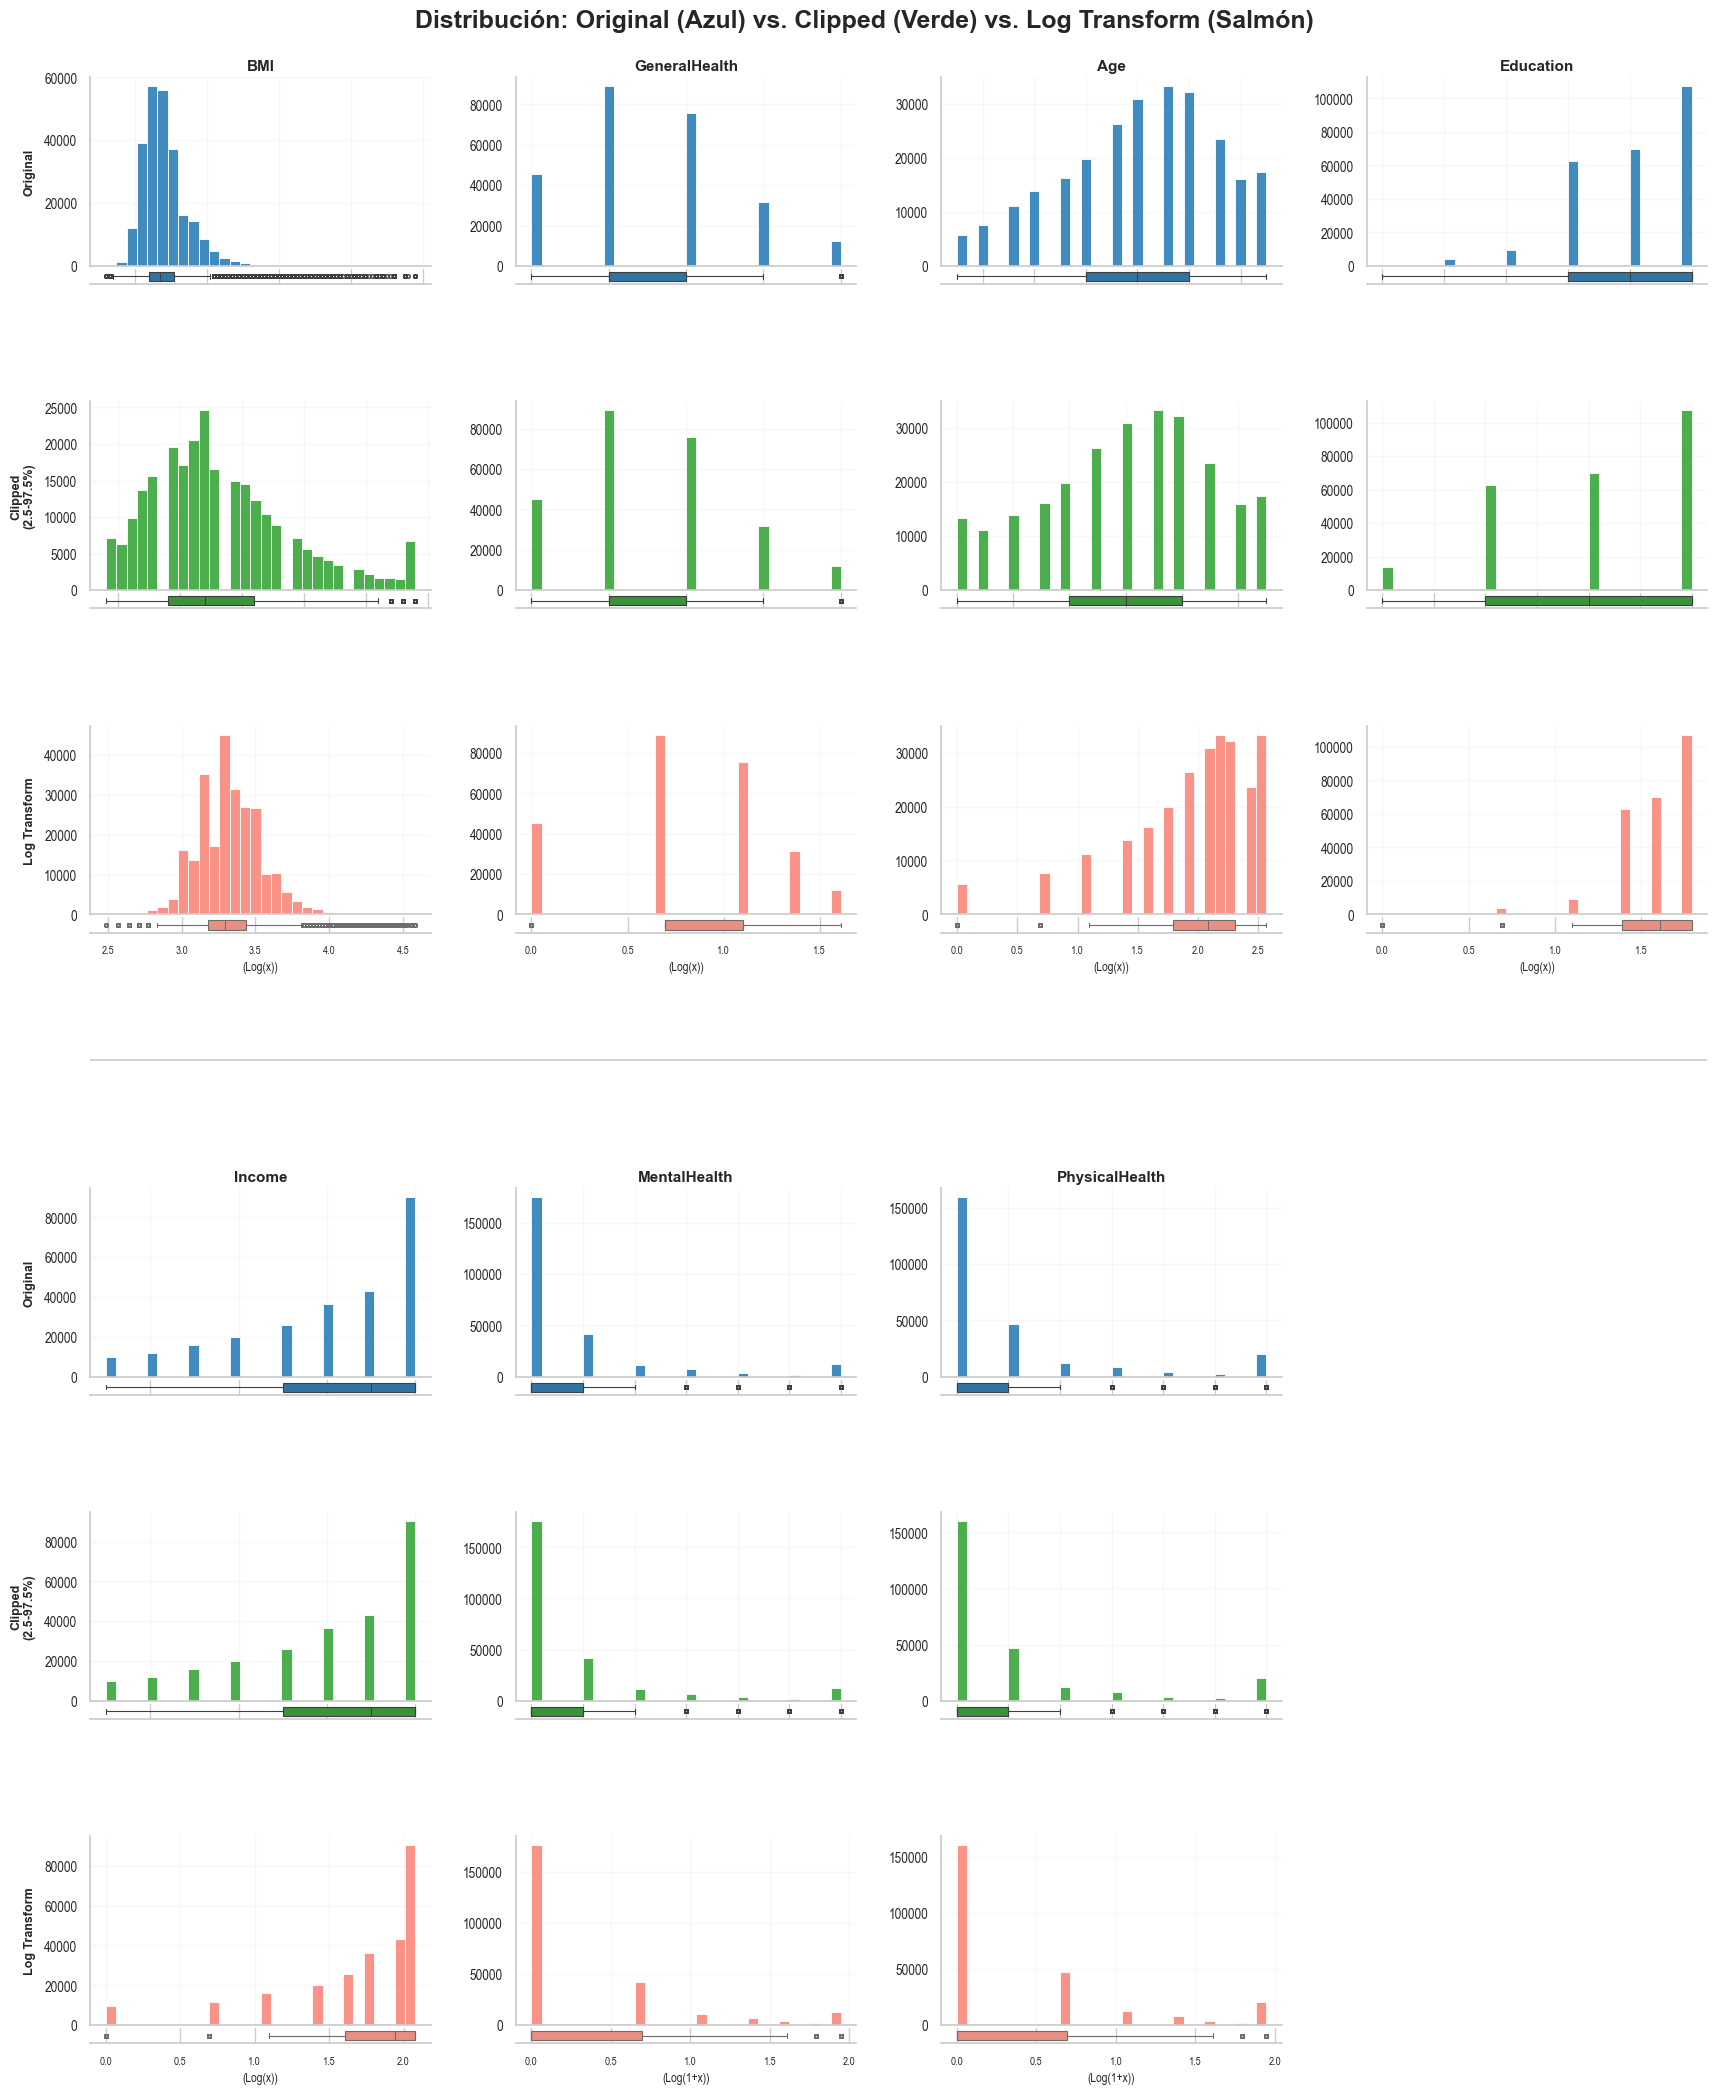

In [107]:
sns.set_theme(style="whitegrid", font_scale=0.95)

cols = 4
num_features = len(numerical_vars + ordinal_vars)
blocks = math.ceil(num_features / cols) # Número de "meta-filas"

# --- Lógica del Grid con Espaciadores ---
total_rows = (blocks * 3) + max(0, blocks - 1)
height_ratios = []
for b in range(blocks):
    height_ratios.extend([1, 1, 1]) # Ratios para [con, sin, log]
    if b < blocks - 1:
        height_ratios.extend([0.1]) # Ratio para el espaciador gris

# Paletas
color_with = "#1f77b4"   # azul
color_without = "#2ca02c" # verde
color_log = "#FA8072"      # rojo salmón

# Histogramas más altos respecto al boxplot
plot_height_ratios = [15, 1.2] # Más alto

# --- Figura y Grid ---
# Ajustar altura total de la figura para acomodar espaciadores
fig_height = (blocks * 10.8) + (max(0, blocks - 1) * 1.0) 
fig = plt.figure(figsize=(cols * 4.3, fig_height))
gs_main = fig.add_gridspec(total_rows, cols, hspace=0.65, wspace=0.25, height_ratios=height_ratios)

print(f"Generando grid de {total_rows} filas ({blocks} bloques) y {cols} columnas...")

for vi, col in enumerate(numerical_vars + ordinal_vars):
    block = vi // cols
    col_pos = vi % cols
    
    # Índices de fila ajustados para el espaciador
    row_con = block * 4
    row_sin = row_con + 1
    row_log = row_con + 2

    # --- Recorte de outliers (para fila 2) ---
    try:
        q_low, q_high = df[col].quantile(0.025), df[col].quantile(0.975)
        clipped = df[col].clip(q_low, q_high)
        clip_error = None
    except Exception as e:
        clipped = df[col] # Fallback
        clip_error = str(e)

    # --- Transformación Logarítmica (para fila 3) ---
    log_data = None
    log_label = "Log(x)"
    log_error = None
    try:
        min_val = df[col].min()
        if min_val > 0:
            log_data = np.log(df[col])
            log_label = "Log(x)"
        elif min_val >= 0:
            log_data = np.log1p(df[col])
            log_label = "Log(1+x)"
        else:
            shift = abs(min_val) + 1
            log_data = np.log(df[col] + shift)
            log_label = f"Log(x + {shift:.1f})"
    except Exception as e:
        log_error = str(e)


    # ===== 1. BLOQUE CON OUTLIERS (Azul) =====
    gs_con = gs_main[row_con, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_with = fig.add_subplot(gs_con[0, 0])
    ax_box_with = fig.add_subplot(gs_con[1, 0], sharex=ax_hist_with)

    try:
        sns.histplot(df[col], bins=30, ax=ax_hist_with,
                     color=color_with, alpha=0.85, line_kws={'linewidth': 1.3})
        # Título de la columna, solo en el plot superior
        ax_hist_with.set_title(f"{col}", fontsize=11, weight='semibold', pad=5) 
        ax_hist_with.set_xlabel('')
        ax_hist_with.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_with.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_with.set_ylabel('Original', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_with.set_ylabel('')
        sns.despine(ax=ax_hist_with)
    except Exception as e:
        ax_hist_with.set_title(f"{col}\n(Error: {e})", fontsize=10, color='red')

    sns.boxplot(x=df[col], ax=ax_box_with, color=color_with, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_with.set_yticks([])
    ax_box_with.set_xlabel('')
    ax_box_with.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_with, left=True, top=True, right=True)


    # ===== 2. BLOQUE SIN OUTLIERS (Verde) =====
    gs_sin = gs_main[row_sin, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_without = fig.add_subplot(gs_sin[0, 0])
    ax_box_without = fig.add_subplot(gs_sin[1, 0], sharex=ax_hist_without)

    try:
        data_to_plot = clipped if clip_error is None else df[col]
        sns.histplot(data_to_plot, bins=30, ax=ax_hist_without,
                     color=color_without, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_without.set_title('') # Sin título aquí
        if clip_error:
             ax_hist_without.set_title(f"(Error clip: {clip_error})", fontsize=10, color='red')
        ax_hist_without.set_xlabel('')
        ax_hist_without.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_without.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_without.set_ylabel('Clipped\n(2.5-97.5%)', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_without.set_ylabel('')
        sns.despine(ax=ax_hist_without)
    except Exception as e:
        ax_hist_without.set_title(f"(Error plot: {e})", fontsize=10, color='red')

    sns.boxplot(x=data_to_plot, ax=ax_box_without, color=color_without, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_without.set_yticks([])
    ax_box_without.set_xlabel('')
    ax_box_without.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_without, left=True, top=True, right=True)


    # ===== 3. BLOQUE CON LOG TRANSFORM (Salmón) =====
    gs_log = gs_main[row_log, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_log = fig.add_subplot(gs_log[0, 0])
    ax_box_log = fig.add_subplot(gs_log[1, 0], sharex=ax_hist_log)

    try:
        if log_error:
            raise Exception(log_error)
        
        sns.histplot(log_data,  bins=30, ax=ax_hist_log,
                     color=color_log, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_log.set_title('') # Sin título aquí
        ax_hist_log.set_xlabel('')
        ax_hist_log.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_log.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_log.set_ylabel('Log Transform', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_log.set_ylabel('')
        sns.despine(ax=ax_hist_log)
    except Exception as e:
        ax_hist_log.set_title(f"(Error Log: {e})", fontsize=10, color='red')

    if log_data is not None:
        # --- CORRECCIÓN AQUÍ ---
        # Cambiado de 'ax_log_box' a 'ax_box_log'
        sns.boxplot(x=log_data, ax=ax_box_log, color=color_log, fliersize=2.5, linewidth=0.8, width=0.6)
    
    ax_box_log.set_yticks([])
    # Etiqueta X solo con la transformación, el nombre de la col ya está arriba
    ax_box_log.set_xlabel(f"({log_label})", fontsize=9) 
    ax_box_log.tick_params(axis='x', labelsize=8)
    sns.despine(ax=ax_box_log, left=True, top=True, right=True)


# Ocultar huecos vacíos
for i in range(num_features, blocks * cols):
    block_num = i // cols
    col_num = i % cols
    for row_offset in [0, 1, 2]: # Ocultar las 3 filas de plot
        try:
            ax = fig.add_subplot(gs_main[block_num * 4 + row_offset, col_num])
            ax.set_visible(False)
        except:
            pass

# --- Añadir líneas separadoras ---
for b in range(blocks - 1):
    spacer_row_index = (b * 4) + 3 # Índice de la fila espaciadora
    ax_spacer = fig.add_subplot(gs_main[spacer_row_index, :]) # Span all columns
    ax_spacer.axhline(0.5, color='#CCCCCC', linewidth=1.2)
    ax_spacer.axis('off')

# Título más pegado a los plots
plt.suptitle("Distribución: Original (Azul) vs. Clipped (Verde) vs. Log Transform (Salmón)",
             fontsize=18, weight='bold', y=0.97) 
fig.subplots_adjust(top=0.94, bottom=0.07, left=0.05, right=0.99)

plt.show()



#### PASO 5: ANALISIS DE CORRELACIONES ENTRE LAS VARIABLES


Calculando correlación de features numéricas y ordinales con el target...

--- Correlación de las variables con la variable target (orientado a FSS) ---
Income              -0.171483
Education           -0.130517
PhysActivity        -0.121947
Veggies             -0.058972
Heavy_drinking      -0.057882
Fruits              -0.042192
HealthCare           0.015410
Sex                  0.031040
Unaffordable_care    0.035436
Smoker               0.062914
CholCheck            0.067546
MentalHealth         0.068967
Stroke               0.107179
PhysicalHealth       0.175803
HeartAttack          0.180272
Age                  0.185026
HighChol             0.209085
DiffWalk             0.224239
BMI                  0.224379
HighBP               0.271596
GeneralHealth        0.302587
Name: Diabetes, dtype: float64


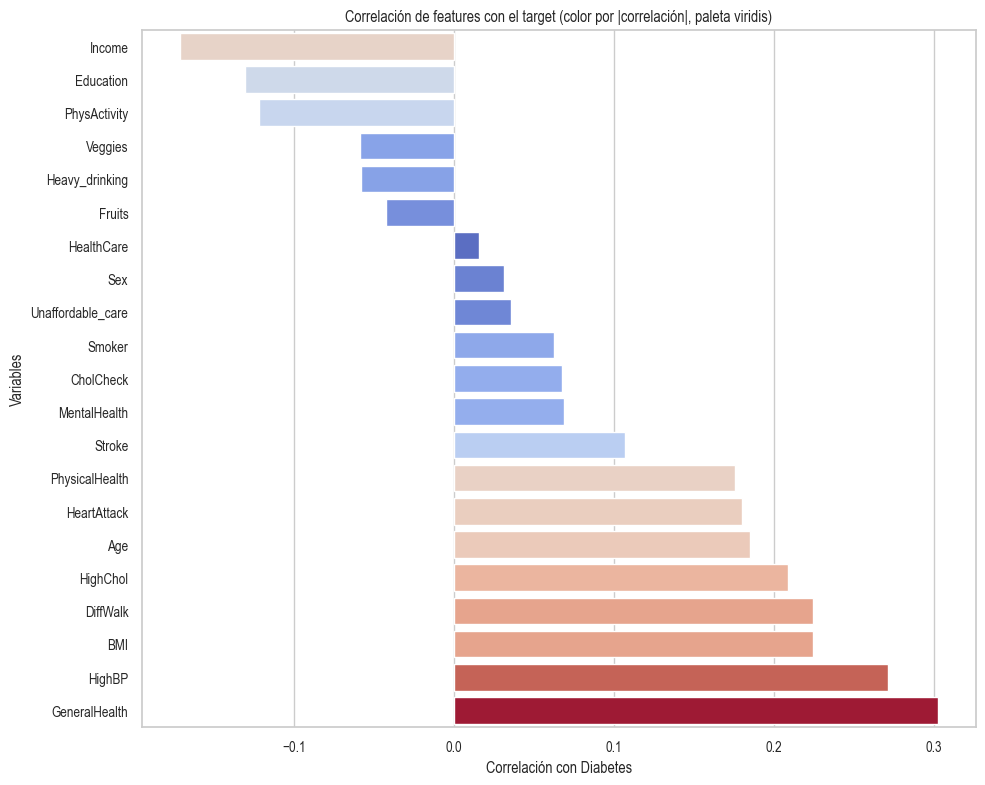

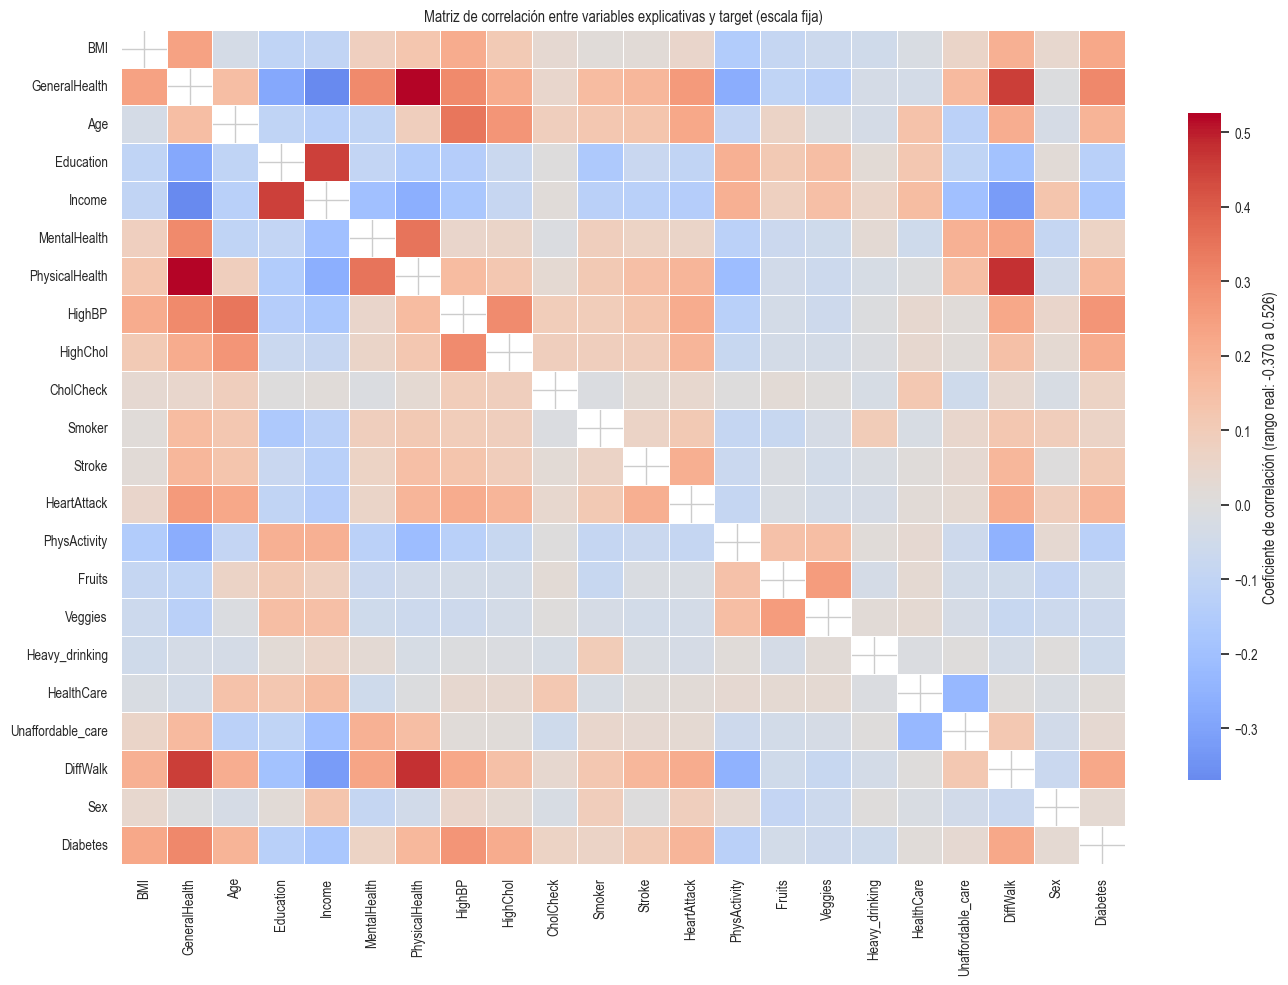

In [108]:
# --- Correlación de variables explicativas con la target ---
print("\nCalculando correlación de features numéricas y ordinales con el target...")

cols_to_corr = numerical_vars + ordinal_vars + categorical_vars + [TARGET_COL]

corr_matrix = df[cols_to_corr].corr()
corr_with_target = corr_matrix[TARGET_COL].sort_values(ascending=True)

print(f"\n--- Correlación de las variables con la variable target (orientado a FSS) ---")
print(corr_with_target.drop(TARGET_COL))


# ==========  BARRAS DE CORRELACIÓN CON LA VARIABLE OBJETIVO =========
corr_vals = corr_with_target.drop(TARGET_COL)

# Normalizar valores para mapear a color (usando magnitud)
norm = plt.Normalize(vmin=0, vmax=corr_vals.abs().max())

# Paleta alternativa: viridis, plasma, magma, inferno, cividis, crest...
# cmap = plt.cm.viridis  
cmap = plt.cm.coolwarm  

colors = cmap(norm(corr_vals.abs()))

plt.figure(figsize=(10, 8))
sns.barplot(
    x=corr_vals,
    y=corr_vals.index,
    orient="h",
    palette=colors
)
plt.title("Correlación de features con el target (color por |correlación|, paleta viridis)")
plt.xlabel("Correlación con Diabetes")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


# ==========  HEATMAP DE CORRELACIÓN ENTRE LAS VARIABLES ================

plt.figure(figsize=(14, 10))

# Obtener valores fuera de la diagonal
corr_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
mask = np.eye(corr_matrix.shape[0], dtype=bool)


# Calcular escala real mínima y máxima
vmin = corr_no_diag.min().min()   # mínimo fuera de la diagonal
vmax = corr_no_diag.max().max()   # máximo fuera de la diagonal

ax = sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    mask=mask,
    linewidths=0.5,
    cbar=True,
    vmin=vmin,        # escala basada en correlaciones reales
    vmax=vmax,
    cbar_kws={
        "shrink": 0.8,
        "label": f"Coeficiente de correlación (rango real: {vmin:.3f} a {vmax:.3f})"
    }
)
plt.title("Matriz de correlación entre variables explicativas y target (escala fija)")
plt.tight_layout()
plt.show()


Aquí ya podemos ver las primeras cosas interesantes, por ejemplo que están relacionadas la salud física, general y la dificultad para andar. Es importante también  correlación negativa con la cantidad de ingresos y educación y con la actividad física

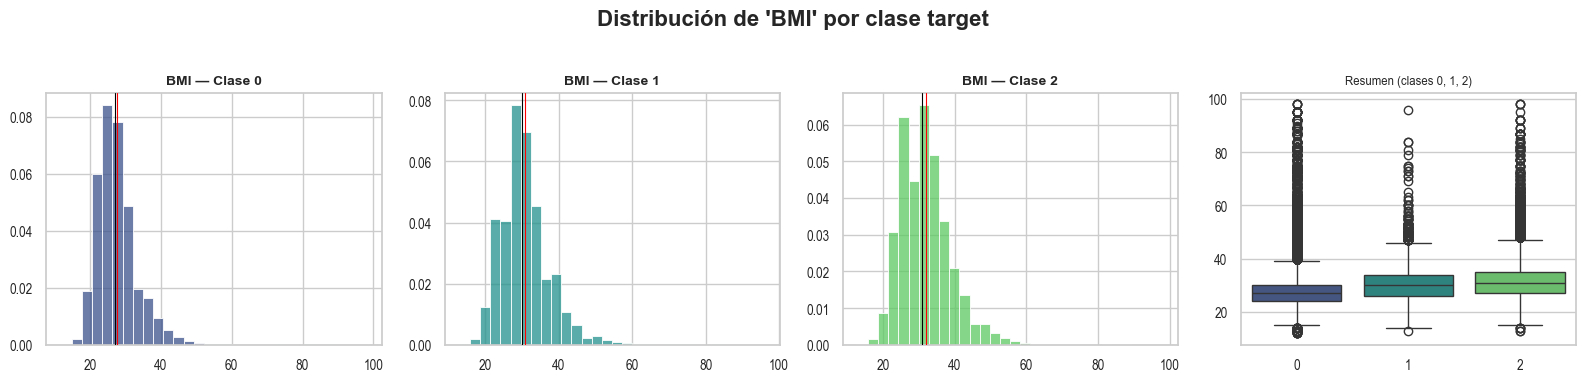

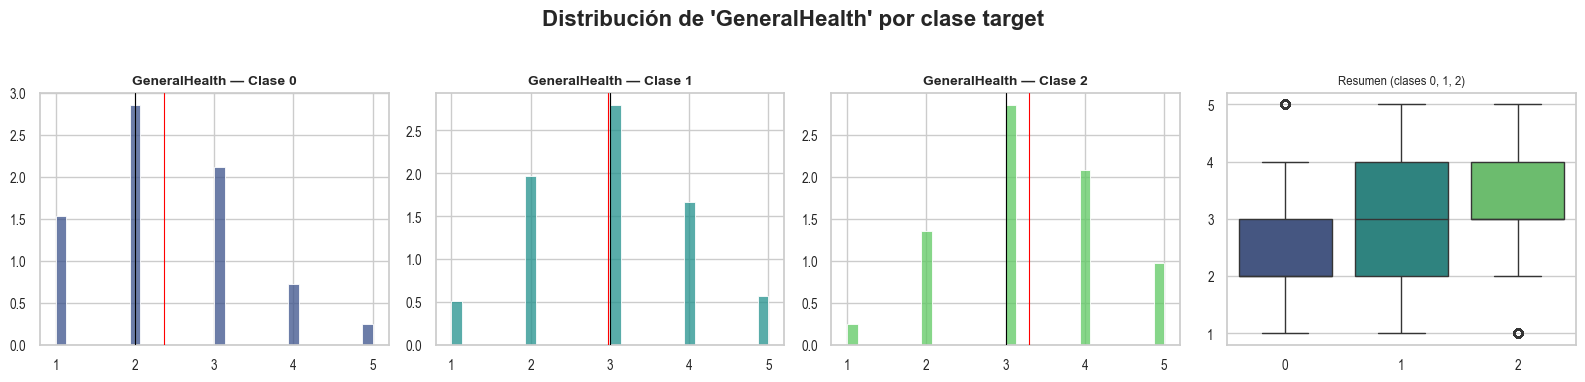

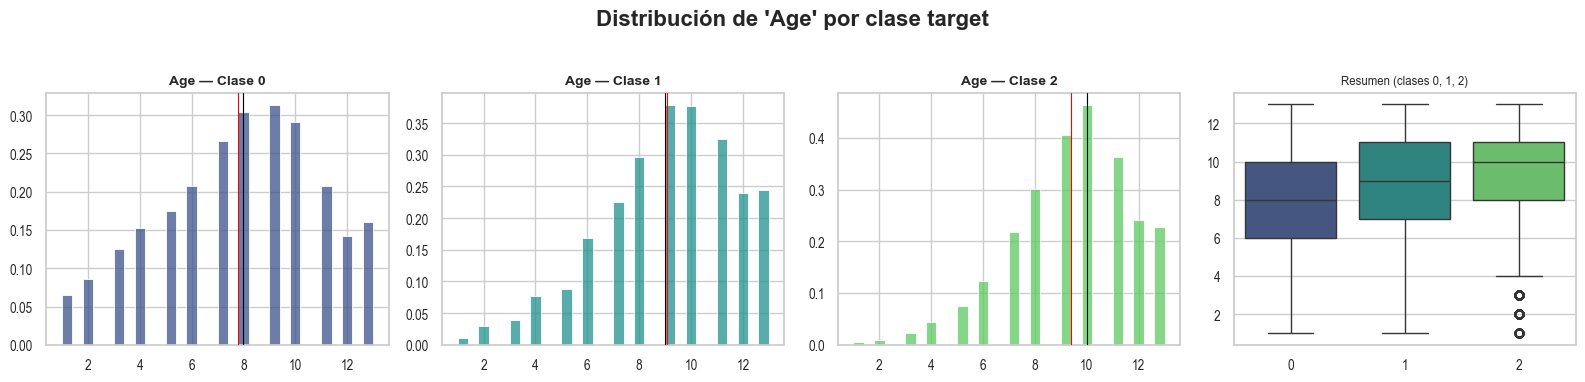

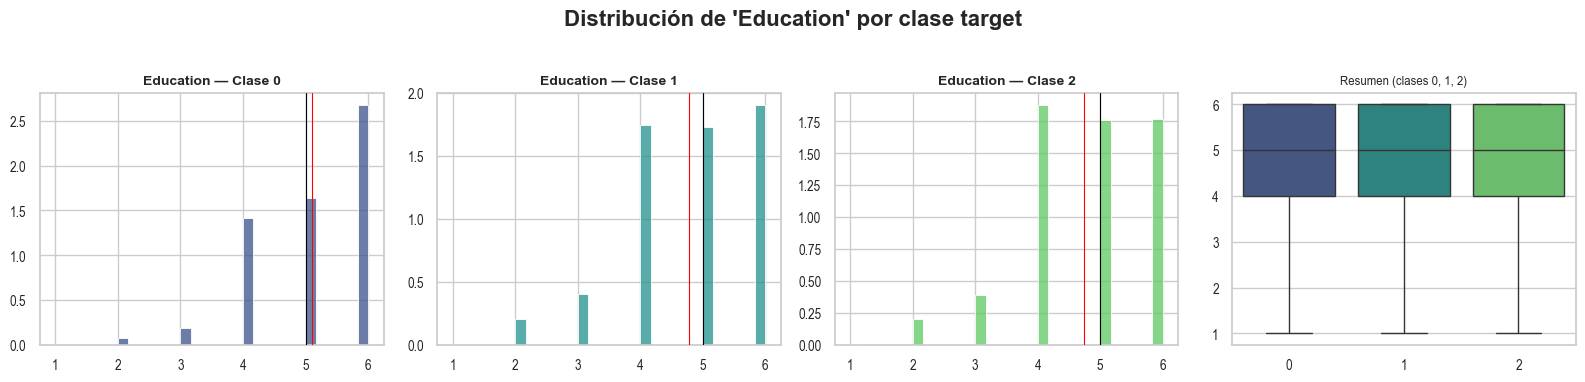

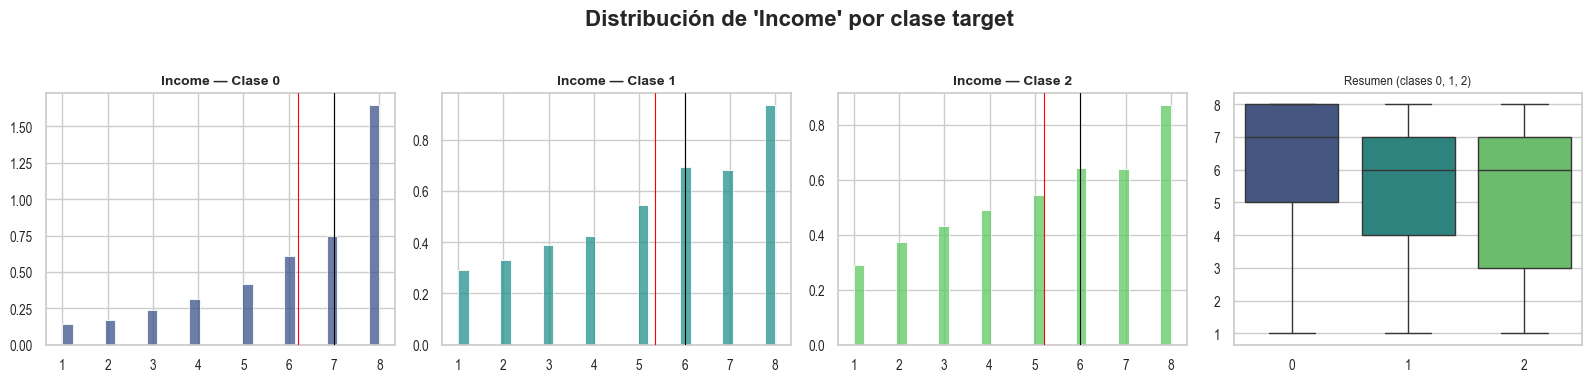

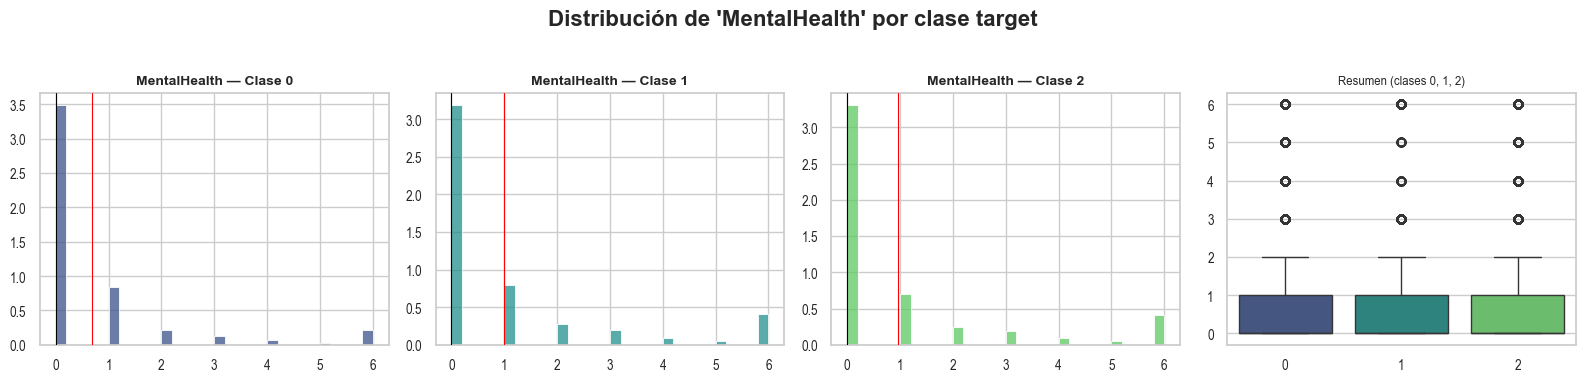

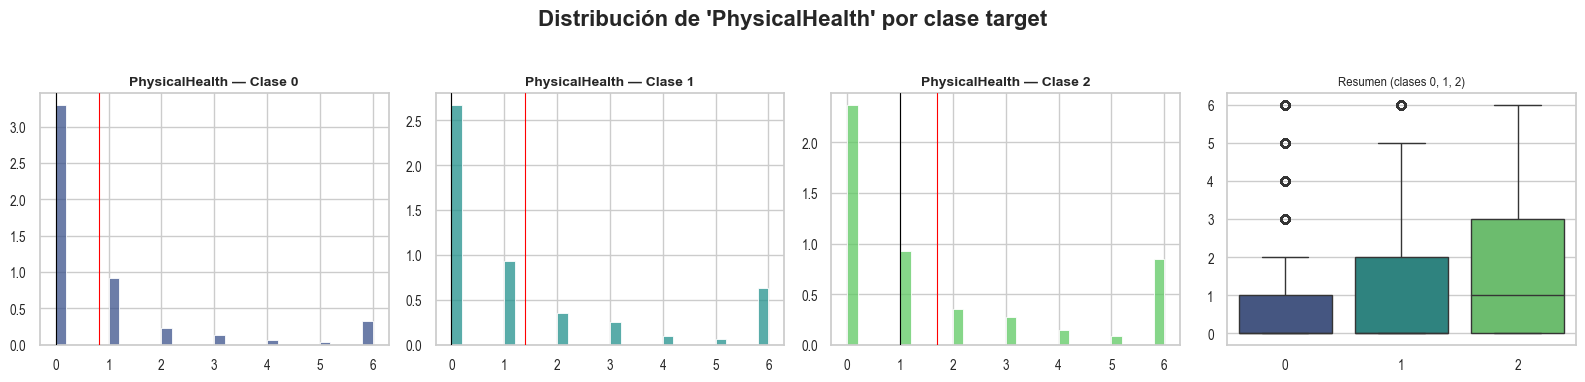

In [ ]:
# ====== Distribuciones por clase del target (figura por feature) =======
unique_classes = sorted(df[TARGET_COL].dropna().unique())
n_classes = len(unique_classes)
palette = sns.color_palette('viridis', n_colors=n_classes)

n_cols = 4              # siempre 4 columnas por figura
group_size = 3          # agrupar las clases en grupos de 3 columnas

for col in numerical_vars + ordinal_vars:
    n_group_rows = math.ceil(n_classes / group_size)
    fig_h = 4 
    fig_w = 4 * 4                      
    fig, axes = plt.subplots(n_group_rows, n_cols, figsize=(fig_w, fig_h), squeeze=False)
    
    class_idx = 0
    for r in range(n_group_rows):
        for c in range(n_cols):
            ax = axes[r, c]
            # Las primeras 3 columnas de cada fila son para clases (si quedan)
            if c < group_size:
                if class_idx < n_classes:
                    target_val = unique_classes[class_idx]
                    subset = df[df[TARGET_COL] == target_val][col].dropna()
                    sns.histplot(subset, bins=30, ax=ax, color=palette[class_idx],
                                 line_kws={'linewidth': 1}, stat="density")
                    ax.set_title(f"{col} — Clase {data_dict[TARGET_COL]['map'].get(str(target_val))}", fontsize=10, weight='bold')
                    ax.set_xlabel('')
                    ax.set_ylabel('')
                    # medias y medianas
                    if not subset.empty:
                        mean_val = subset.mean()
                        median_val = subset.median()
                        ax.axvline(mean_val, color='red', linewidth=0.8, linestyle='-', zorder=5)
                        ax.axvline(median_val, color='black', linewidth=0.8, linestyle='-', zorder=6)
                else:
                    # eje vacío si ya no hay más clases
                    ax.axis('off')
                class_idx += 1
            else:

                start_idx = r * group_size
                end_idx = min(start_idx + group_size, n_classes)
                classes_in_row = unique_classes[start_idx:end_idx]
                
                if len(classes_in_row) == 0:
                    ax.axis('off')
                else:
                    # Crearemos un pequeño boxplot comparativo con sólo las clases de esta fila
                    data = [df[df[TARGET_COL] == tv][col].dropna() for tv in classes_in_row]
                    # Convertir a DataFrame para seaborn boxplot (más limpio)
                    plot_df = (
                        pd.concat(
                            [pd.DataFrame({col: d, TARGET_COL: tv}) for d, tv in zip(data, classes_in_row)],
                            ignore_index=True
                        ) if any(len(d) > 0 for d in data) else pd.DataFrame(columns=[col, TARGET_COL])
                    )
                    
                    if plot_df.empty:
                        ax.text(0.5, 0.5, "Sin datos", ha='center', va='center')
                        ax.axis('off')
                    else:
                        sns.boxplot(x=TARGET_COL, y=col, data=plot_df, ax=ax,
                                    palette=[palette[unique_classes.index(tv)] for tv in classes_in_row])
                        ax.set_title(f"Resumen (clases {', '.join(map(str, classes_in_row))})", fontsize=10)
                        ax.set_xlabel('')
                        ax.set_ylabel('')
    
    plt.suptitle(f"Distribución de '{col}' por clase target", fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [115]:
data_dict[TARGET_COL]

{'type': 'target',
 'map': {'0': 'No', '1': 'Pre-Diabetes', '2': 'Diabetes'},
 'description': 'Diabetes status. 0 = no diabetes, 1 = prediabetes, 2 = diabetes'}

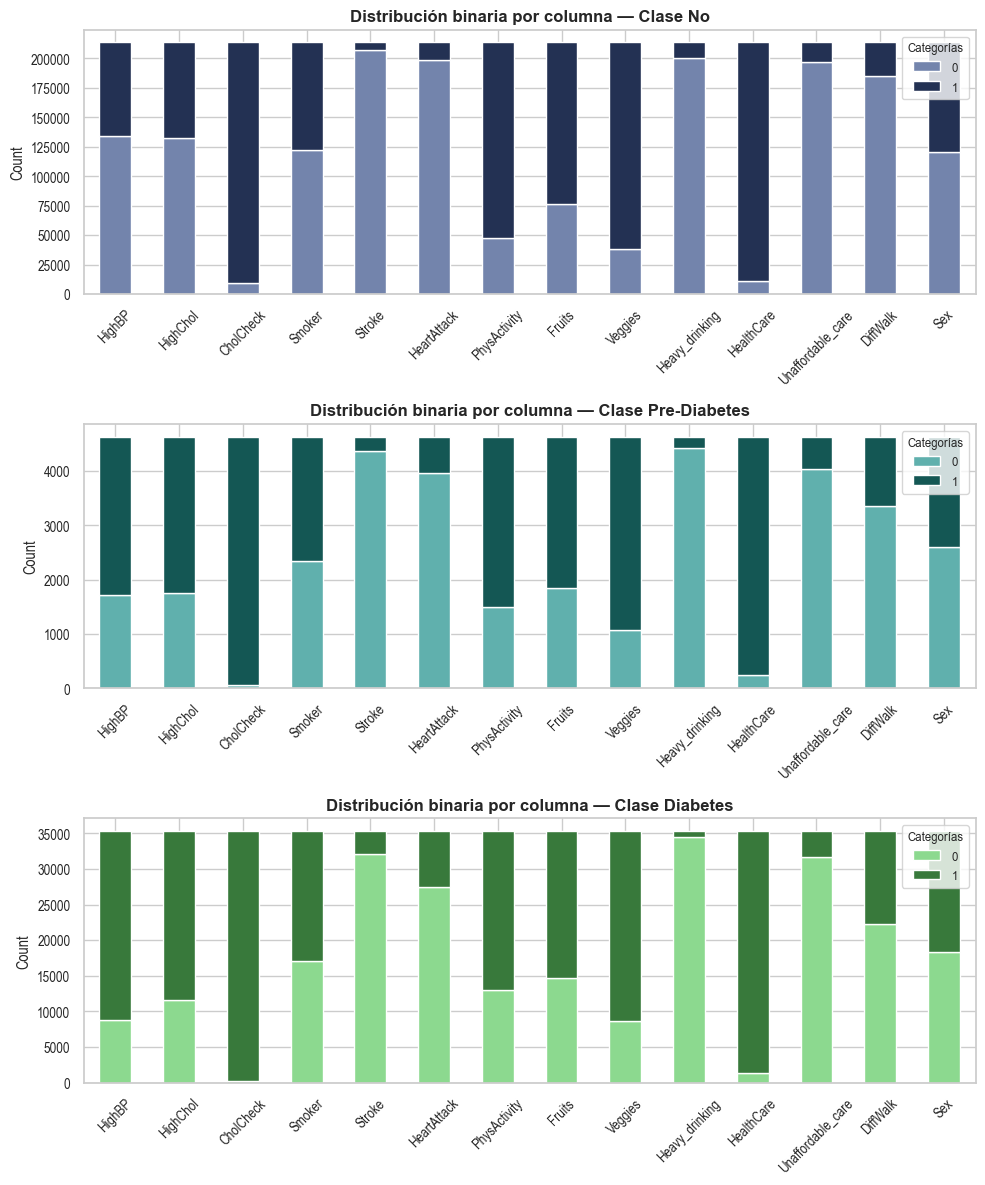

In [ ]:
# ====== Distribuciones por clase del target (stacked binary categorical, viridis tones) =======

unique_classes = sorted(df[TARGET_COL].dropna().unique())

# Seleccionar variables categóricas binarias
binary_cats = [col for col in categorical_vars if df[col].nunique(dropna=True) == 2]

if len(binary_cats) == 0:
    raise ValueError("No se han encontrado variables categóricas binarias en 'categorical_vars'.")

# Tomamos los primeros colores de viridis según nº clases
base_colors = sns.color_palette("viridis", n_colors=len(unique_classes))

# Crear tonos claro & oscuro para cada clase
class_colors = {}
for i, cls in enumerate(unique_classes):
    base = np.array(base_colors[i])
    # generar tonos:
    light = (base + 0.40) / 1.40   # aclarado
    dark  = base * 0.60            # oscurecido
    class_colors[cls] = [light, dark]   # [NO, YES]

# Crear figura con una fila por cada clase
n_rows = len(unique_classes)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4 * n_rows), squeeze=False)

for i, target_val in enumerate(unique_classes):
    ax = axes[i, 0]

    # Conteos por variable
    cat_counts = pd.DataFrame({
        col: df[df[TARGET_COL] == target_val][col].value_counts(dropna=False)
        for col in binary_cats
    }).T.fillna(0)

    # colores claro (No) y oscuro (Yes) según clase
    colors = class_colors[target_val]
    labels = list(cat_counts.columns.astype(str))  # usa 0/1 reales como etiquetas

    cat_counts.plot(kind="bar", stacked=True, ax=ax, color=colors)

    ax.set_ylabel("Count")
    ax.set_xticklabels(cat_counts.index, rotation=45)
    ax.set_title(f"Distribución binaria por columna — Clase {data_dict[TARGET_COL]['map'].get(str(target_val))}", fontsize=12, weight='bold')
    ax.legend(labels=labels, title='Categorías', fontsize=10, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

